## DATA245: Machine Learning 
### Data Quality Prediction

#### Group 5: 
> Hruthik Vinnakota <br>
> Maria Hovhannisyan <br>
> Sahanti Samarth Zade <br>
> Shubham Singh <br> 
> Utsav Rastogi

Air pollution is a global issue, with **PM2.5** particulate matter posing significant health risks to humans. Beijing, in particular, has long suffered from high levels of air pollution, with a combination of industrial activities, vehicular emissions, and unfavorable weather conditions contributing to the problem. The World Health Organization estimates that air pollution is responsible for around 2 million deaths in China every year.

To address this problem, predicting **PM2.5** levels has become an important tool for policymakers, researchers, and the public. By using advanced techniques, we can forecast the levels of **PM2.5** and other pollutants in the air. This information can help people make informed decisions about their health, reduce their exposure to air pollution, and inform policy decisions on air quality regulations. Predicting **PM2.5** levels is an important step towards mitigating the harmful effects of air pollution and improving the quality of life for people living in polluted areas.

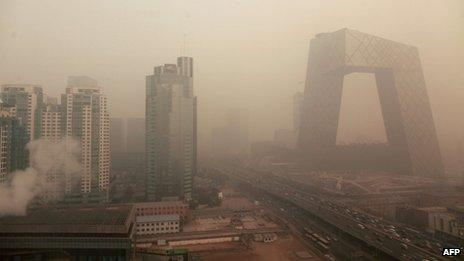

**No:** row number <br>
**year:** year of data in this row<br>
**month:** month of data in this row<br>
**day:** day of data in this row<br>
**hour:** hour of data in this row<br>
**PM2.5:** PM2.5 concentration (ug/m^3)<br>
**PM10:** PM10 concentration (ug/m^3)<br>
**SO2:** SO2 concentration (ug/m^3)<br>
**NO2:** NO2 concentration (ug/m^3)<br>
**CO:** CO concentration (ug/m^3)<br>
**O3:** O3 concentration (ug/m^3)<br>
**TEMP:** temperature (degree Celsius)<br>
**PRES:** pressure (hPa)<br>
**DEWP:** dew point temperature (degree Celsius)<br>
**RAIN:** precipitation (mm)<br>
**wd:** wind direction<br>
**WSPM:** wind speed (m/s)<br>
**station:** name of the air-quality monitoring site

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
file_names = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv'
]
dfs = [pd.read_csv(file_name) for file_name in file_names]

In [3]:
df = pd.concat(dfs)

In [4]:
df.drop('No', axis =1 , inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210384 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     210384 non-null  int64  
 1   month    210384 non-null  int64  
 2   day      210384 non-null  int64  
 3   hour     210384 non-null  int64  
 4   PM2.5    205894 non-null  float64
 5   PM10     207065 non-null  float64
 6   SO2      206447 non-null  float64
 7   NO2      204532 non-null  float64
 8   CO       198724 non-null  float64
 9   O3       204281 non-null  float64
 10  TEMP     210167 non-null  float64
 11  PRES     210174 non-null  float64
 12  DEWP     210167 non-null  float64
 13  RAIN     210179 non-null  float64
 14  wd       209705 non-null  object 
 15  WSPM     210214 non-null  float64
 16  station  210384 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 28.9+ MB


In [6]:
df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       4490
PM10        3319
SO2         3937
NO2         5852
CO         11660
O3          6103
TEMP         217
PRES         210
DEWP         217
RAIN         205
wd           679
WSPM         170
station        0
dtype: int64

In [7]:
for i in df.columns:
    print(df[i].value_counts(),"\n")

2016    52704
2014    52560
2015    52560
2013    44064
2017     8496
Name: year, dtype: int64 

1     17856
3     17856
5     17856
7     17856
8     17856
10    17856
12    17856
4     17280
6     17280
9     17280
11    17280
2     16272
Name: month, dtype: int64 

1     6912
2     6912
28    6912
27    6912
26    6912
25    6912
24    6912
23    6912
22    6912
21    6912
20    6912
19    6912
18    6912
17    6912
16    6912
15    6912
14    6912
13    6912
12    6912
11    6912
10    6912
9     6912
8     6912
7     6912
6     6912
5     6912
4     6912
3     6912
29    6480
30    6336
31    4032
Name: day, dtype: int64 

0     8766
1     8766
22    8766
21    8766
20    8766
19    8766
18    8766
17    8766
16    8766
15    8766
14    8766
13    8766
12    8766
11    8766
10    8766
9     8766
8     8766
7     8766
6     8766
5     8766
4     8766
3     8766
2     8766
23    8766
Name: hour, dtype: int64 

3.0      4142
10.0     3660
11.0     3597
9.0      3534
12.0     3514
   

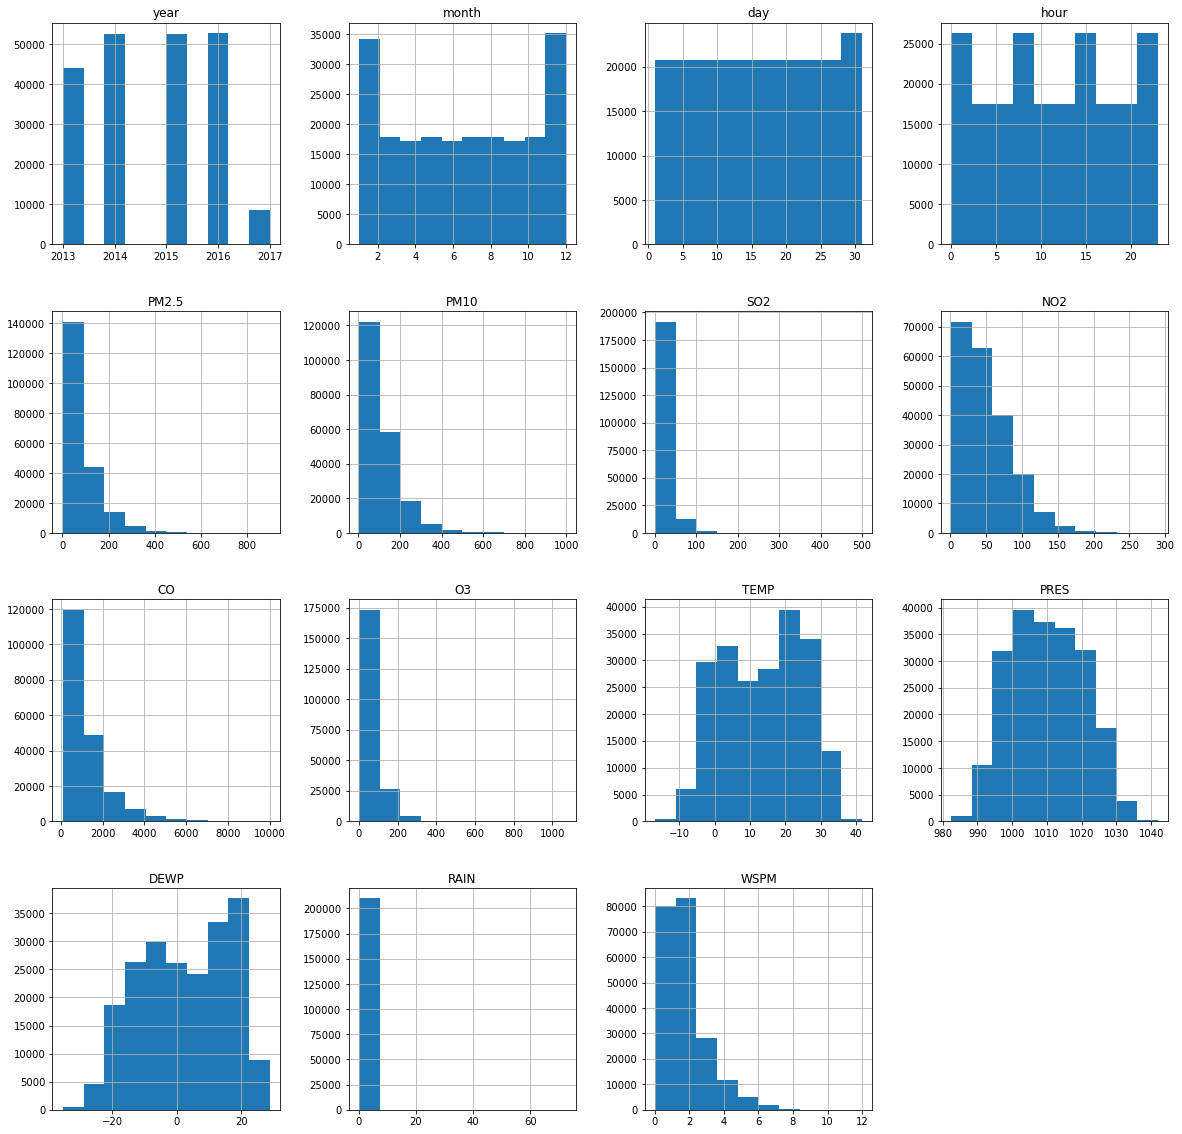

In [8]:
df.hist(figsize = (20,20));

In [9]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,210384.000000,210384.000000,210384.000000,210384.000000,205894.000000,207065.000000,206447.000000,204532.000000,198724.000000,204281.000000,210167.000000,210174.000000,210167.000000,210179.000000,210214.000000
mean,2014.662560,6.522930,15.729637,11.500000,78.811668,104.468581,15.929160,49.784725,1207.219752,58.918974,13.679546,1010.099416,2.386092,0.064009,1.721474
std,1.177199,3.448711,8.800113,6.922203,80.039846,91.811156,21.461759,35.112403,1146.832220,56.603782,11.380391,10.470035,13.785497,0.827833,1.257807
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,22.000000,500.000000,13.000000,3.300000,1001.600000,-9.100000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,54.000000,82.000000,7.996800,42.000000,800.000000,47.000000,14.600000,1009.700000,2.900000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,110.000000,146.000000,20.000000,70.000000,1500.000000,84.000000,23.300000,1018.400000,15.000000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,898.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.000000,28.800000,72.500000,12.000000


We need to understand what these two column means, especially understand the values of "RAIN" column

In [10]:
df.wd.value_counts() #wd: wind direction

NE     20381
N      17500
NW     16620
ENE    16256
NNW    16037
E      15241
NNE    13258
ESE    13065
SW     12952
WNW    11376
SSW    11163
S       9898
SE      9550
WSW     9222
SSE     8705
W       8481
Name: wd, dtype: int64

In [11]:
df.RAIN.value_counts()

0.0     202000
0.1       1793
0.2        912
0.3        708
0.5        440
         ...  
29.0         1
6.2          1
8.3          1
16.3         1
10.4         1
Name: RAIN, Length: 198, dtype: int64

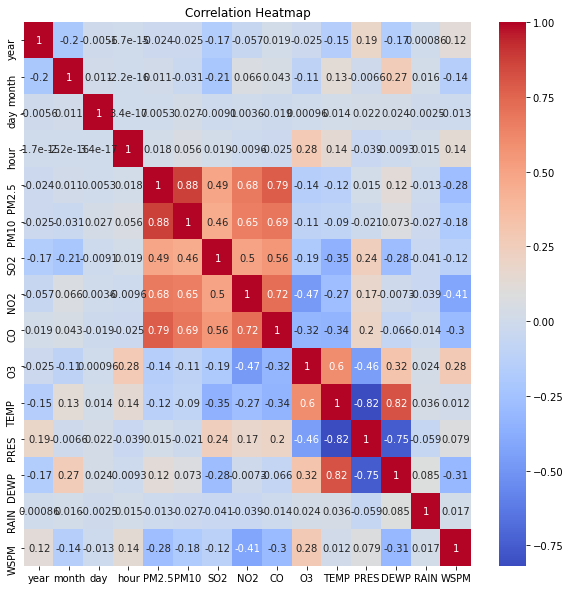

In [12]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# add title
plt.title('Correlation Heatmap')

# show the plot
plt.show()

We can see that our target column which is "PM2.5" have high correlation with "CO", "NO2", "PM10". We need to go more deep to understand if there is any relationship between them. <br> So let's peak only these columns and plot corr heatmap only for those. <br> Also we can see that correlation matrix look very interesting, we can see that there are 2 "squares" on the matrix diagonal.

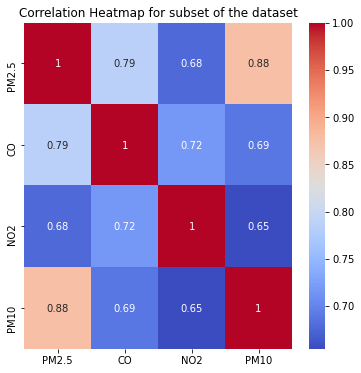

In [13]:
corr_matrix1 = df[['PM2.5', "CO", "NO2", "PM10"]].corr()

fig, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True)

# add title
plt.title('Correlation Heatmap for subset of the dataset')

# show the plot
plt.show()

<Figure size 864x720 with 0 Axes>

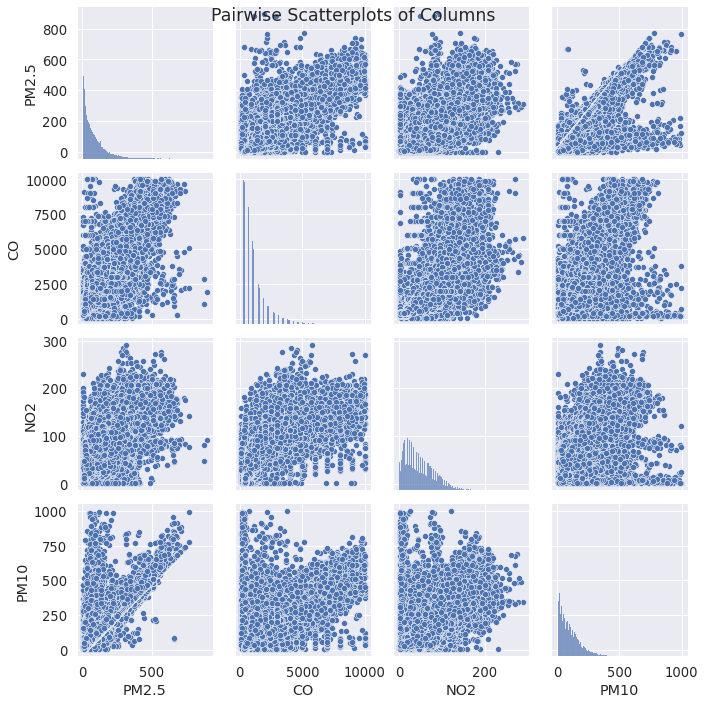

In [14]:
sns.set(font_scale=1.2) # set font scale for larger font
plt.figure(figsize=(12,10))
sns.pairplot(df, vars=['PM2.5', "CO", "NO2", "PM10"])
plt.suptitle('Pairwise Scatterplots of Columns')
plt.show();

## Relationship between target column and categorical columns

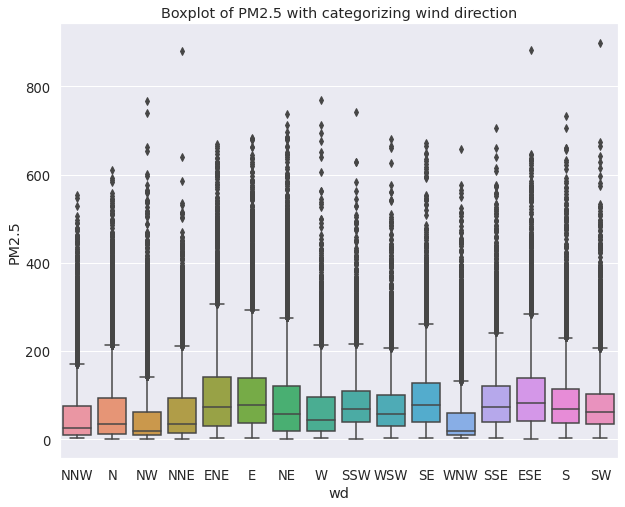

In [15]:
fig, ax = plt.subplots(figsize=(10, 8)) # set the size of the figure

sns.boxplot(x='wd', y='PM2.5', data=df, ax=ax)

plt.title('Boxplot of PM2.5 with categorizing wind direction')

plt.show()

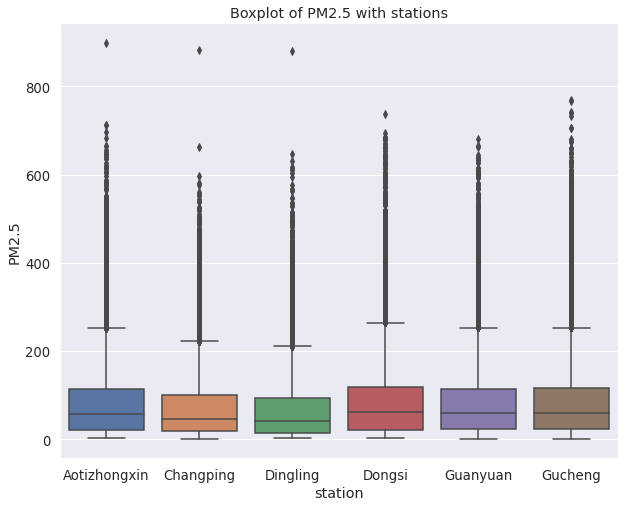

In [16]:
fig, ax = plt.subplots(figsize=(10, 8)) # set the size of the figure

sns.boxplot(x='station', y='PM2.5', data=df, ax=ax)

plt.title('Boxplot of PM2.5 with stations')

plt.show()

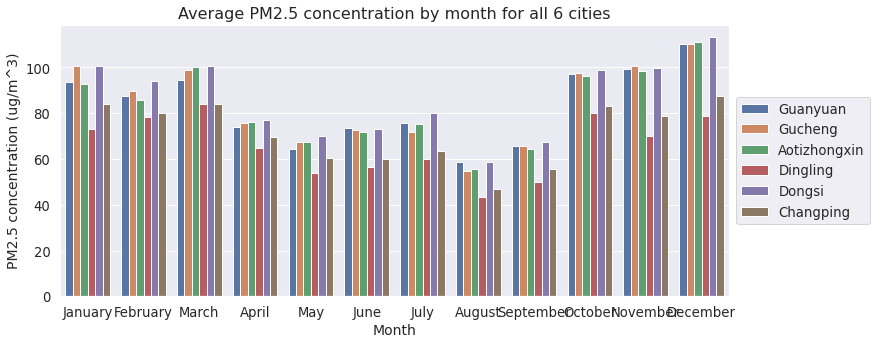

In [17]:
dfs = []

# loop through the file names and read in the csv files
for file in file_names:
    data = pd.read_csv(file, index_col=0, parse_dates=[['year', 'month', 'day']])
    dfs.append(data)

# concatenate the dataframes into a single dataframe
data = pd.concat(dfs)

# create a new column for the name of the month
data['month_name'] = data.index.month_name()

# create a new dataframe with the average PM2.5 concentration by month for each city
city_month_avg = data.groupby(['station', 'month_name'])['PM2.5'].mean().reset_index()

# specify the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# convert the month_name column to a categorical data type with the specified order
city_month_avg['month_name'] = pd.Categorical(city_month_avg['month_name'], categories=month_order, ordered=True)

# sort the dataframe by the month_name column
city_month_avg = city_month_avg.sort_values(by='month_name')

# create a line plot of average PM2.5 concentration by month for all 6 cities
plt.figure(figsize=(12,5))
sns.barplot(x='month_name', y='PM2.5', hue='station', data=city_month_avg)
plt.xlabel('Month', fontsize=14)
plt.ylabel('PM2.5 concentration (ug/m^3)', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Average PM2.5 concentration by month for all 6 cities', fontsize=16)
plt.show()

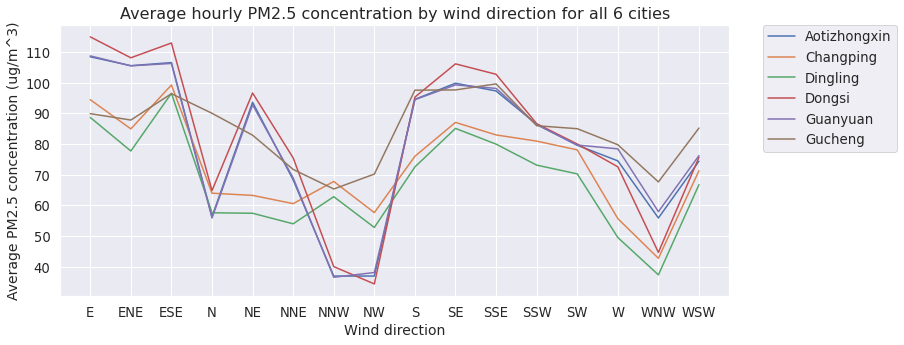

In [18]:
# loop through the file names and read in the csv files
for file in file_names:
    data = pd.read_csv(file, index_col=0, parse_dates=[['year', 'month', 'day', 'hour']])
    dfs.append(df)

# concatenate the dataframes into a single dataframe
data = pd.concat(dfs)

# create a new dataframe with the average PM2.5 concentration by wind direction for each city
city_wd_avg = data.groupby(['station', 'wd'])['PM2.5'].mean().reset_index()

# create a line plot of average PM2.5 concentration by wind direction for all 6 cities
plt.figure(figsize=(12,5))
sns.lineplot(x='wd', y='PM2.5', hue='station', data=city_wd_avg)
plt.xlabel('Wind direction', fontsize=14)
plt.ylabel('Average PM2.5 concentration (ug/m^3)', fontsize=14)
plt.title('Average hourly PM2.5 concentration by wind direction for all 6 cities', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # move the legend outside the plot
plt.show()

## PM2.5


PM2.5 stands for Particulate Matter 2.5, and it refers to microscopic particles or droplets that are smaller than 2.5 micrometers in diameter. These particles can come from natural sources such as dust, wildfires, and volcanoes, or from human-made sources such as vehicle exhaust, industrial emissions, and burning fossil fuels.

PM2.5 is considered a major air pollutant, and exposure to high levels of PM2.5 has been linked to a range of health problems including asthma, heart disease, stroke, and lung cancer.

To measure the level of PM2.5 in the air, a device called a PM2.5 monitor or a particle counter is used. The device uses a laser beam to count the number of particles of a certain size in the air. The concentration of PM2.5 is reported in micrograms per cubic meter (μg/m³).

PM2.5 is one of several air quality indicators used to measure the quality of the air. Other indicators include ozone (O3), nitrogen dioxide (NO2), sulfur dioxide (SO2), and carbon monoxide (CO). Governments and organizations around the world monitor these indicators to assess air quality and to develop policies and regulations to reduce air pollution and protect public health.

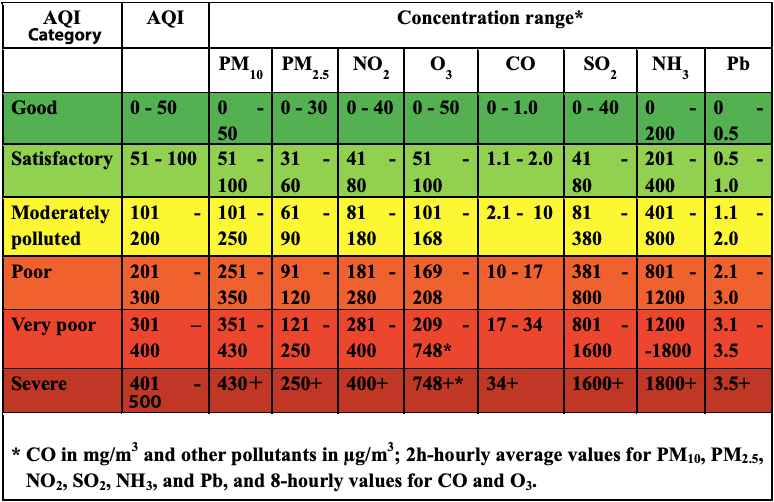

Let's see how our dataset is distributed according to this standards

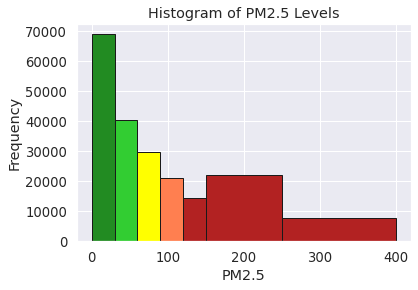

In [19]:
fig, ax = plt.subplots()

N, bins, patches = ax.hist(df['PM2.5'], edgecolor='k', bins=[0, 30, 60, 90, 120,150,250,400])

for i in range(0,1):
    patches[i].set_facecolor('forestgreen')
for i in range(1,2):    
    patches[i].set_facecolor('limegreen')
for i in range(2,3):    
    patches[i].set_facecolor('yellow')
for i in range(3,4):    
    patches[i].set_facecolor('coral')
for i in range(4, len(patches)):
    patches[i].set_facecolor('firebrick')

ax.set_xlabel('PM2.5')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of PM2.5 Levels')

plt.show()

In [20]:
good = df[(df['PM2.5']<100)].shape[0]
bad = df[(df['PM2.5']>=100)].shape[0]

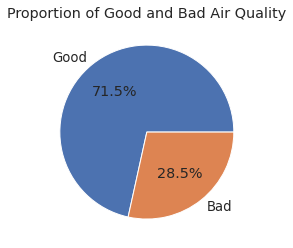

In [21]:
plt.pie([good, bad], labels=['Good', 'Bad'], autopct='%1.1f%%')

# Add a title
plt.title('Proportion of Good and Bad Air Quality')

# Show the plot
plt.show()

# Data Preparation

In [22]:
df.drop(['year','month','day','hour'],axis=1,inplace = True)

In [23]:
# Split the dataframe into continuous and categorical columns
continuous_cols = df.drop(['wd', 'station'],axis=1).columns
categorical_cols = ['wd', 'station']

df_continuous = df[continuous_cols]
df_categorical = df[categorical_cols]

In [24]:
# Standardize the continuous columns
scaler = StandardScaler()
df_continuous_scaled = scaler.fit_transform(df_continuous)

In [25]:
# One-hot encode the categorical columns
encoder = OneHotEncoder()
df_categorical_encoded = encoder.fit_transform(df_categorical)

In [26]:
# Combine the standardized continuous columns and one-hot encoded categorical columns
df_scaled_encoded = pd.concat([pd.DataFrame(df_continuous_scaled, columns=continuous_cols), 
                               pd.DataFrame(df_categorical_encoded.toarray(), 
                                            columns=encoder.get_feature_names(categorical_cols))], axis=1)

In [27]:
# Instantiate a KNNImputer object with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to your dataframe
imputer.fit(df_scaled_encoded)

# Transform your dataframe to fill the missing values
df_filled_scaled_encoded = pd.DataFrame(imputer.transform(df_scaled_encoded), columns=df_scaled_encoded.columns)

In [28]:
df_filled_scaled_encoded

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,wd_W,wd_WNW,wd_WSW,wd_nan,station_Aotizhongxin,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng
0,-0.934683,-1.094299,-0.555835,-1.218510,-0.791068,0.319432,-1.263540,1.232146,-1.536843,-0.077321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.884707,-1.050731,-0.555835,-1.218510,-0.791068,0.319432,-1.298688,1.251248,-1.493319,-0.077321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.897201,-1.061623,-0.509240,-1.133070,-0.791068,0.248765,-1.298688,1.279902,-1.493319,-0.077321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.909695,-1.072515,-0.229672,-1.104590,-0.791068,0.231099,-1.325050,1.375413,-1.580367,-0.077321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.947176,-1.105191,-0.183078,-1.076110,-0.791068,0.231099,-1.377772,1.442270,-1.587621,-0.077321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,-0.809745,-0.506133,-0.555835,-0.876750,-0.616674,-0.051569,-0.077286,-0.019046,-1.406270,-0.077321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210380,-0.647325,-0.233835,-0.462645,0.290931,-0.442280,-0.581570,-0.226666,0.028709,-1.297460,-0.077321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210381,-0.709794,-0.734864,-0.416051,0.063091,-0.529477,-0.563903,-0.279389,0.066913,-1.326476,-0.077321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210382,-0.872214,-0.887352,-0.602429,-1.047630,-0.703871,-0.033902,-0.419982,0.076464,-1.253936,-0.077321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
# Exclude the target column from the PCA analysis
X = df_filled_scaled_encoded.drop('PM2.5', axis=1)

# Instantiate a PCA object
pca = PCA()

# Fit the PCA object to the features of the dataframe
pca.fit(X)

PCA()

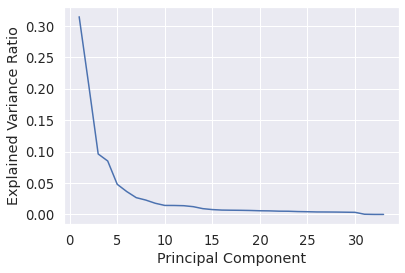

In [31]:
# Plot the explained variance ratio for each principal component
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [32]:
explained_variance = pca.explained_variance_

# Calculate the percentage of explained variance of each principal component
explained_variance_ratio = explained_variance / sum(explained_variance) * 100

# Print the percentage of explained variance of each principal component
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance:.2f}%")

PC1: 31.42%
PC2: 20.65%
PC3: 9.61%
PC4: 8.49%
PC5: 4.79%
PC6: 3.63%
PC7: 2.66%
PC8: 2.28%
PC9: 1.77%
PC10: 1.43%
PC11: 1.42%
PC12: 1.38%
PC13: 1.23%
PC14: 0.92%
PC15: 0.77%
PC16: 0.69%
PC17: 0.67%
PC18: 0.65%
PC19: 0.63%
PC20: 0.58%
PC21: 0.56%
PC22: 0.52%
PC23: 0.50%
PC24: 0.45%
PC25: 0.43%
PC26: 0.39%
PC27: 0.38%
PC28: 0.37%
PC29: 0.35%
PC30: 0.33%
PC31: 0.03%
PC32: 0.00%
PC33: 0.00%


We won't do PCA as it not have high variance

In [33]:
## Inverse transform the standardized continuous columns
df_filled_scaled_encoded[continuous_cols] = scaler.inverse_transform(df_filled_scaled_encoded[continuous_cols])

In [34]:
df_filled_scaled_encoded

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,wd_W,wd_WNW,wd_WSW,wd_nan,station_Aotizhongxin,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210380,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210381,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210382,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
df_filled_scaled_encoded.isna().sum()

PM2.5                   0
PM10                    0
SO2                     0
NO2                     0
CO                      0
O3                      0
TEMP                    0
PRES                    0
DEWP                    0
RAIN                    0
WSPM                    0
wd_E                    0
wd_ENE                  0
wd_ESE                  0
wd_N                    0
wd_NE                   0
wd_NNE                  0
wd_NNW                  0
wd_NW                   0
wd_S                    0
wd_SE                   0
wd_SSE                  0
wd_SSW                  0
wd_SW                   0
wd_W                    0
wd_WNW                  0
wd_WSW                  0
wd_nan                  0
station_Aotizhongxin    0
station_Changping       0
station_Dingling        0
station_Dongsi          0
station_Guanyuan        0
station_Gucheng         0
dtype: int64

In [36]:
df_filled_scaled_encoded.to_csv('imputed_dataframe.csv', index=False)

In [37]:
import joblib

In [38]:
joblib.dump(imputer, 'knn_imputer.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']

## Feature selection

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(df_filled_scaled_encoded.drop('PM2.5',axis=1), df_filled_scaled_encoded['PM2.5'])

DecisionTreeRegressor(random_state=42)

In [41]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = df_filled_scaled_encoded.drop('PM2.5',axis=1).columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
PM10                    0.789702
CO                      0.108824
DEWP                    0.020385
SO2                     0.016202
TEMP                    0.013855
NO2                     0.012203
PRES                    0.010948
O3                      0.008733
WSPM                    0.005438
station_Dingling        0.001976
station_Gucheng         0.001375
station_Changping       0.001374
station_Dongsi          0.001050
station_Aotizhongxin    0.000773
wd_ENE                  0.000590
station_Guanyuan        0.000522
RAIN                    0.000516
wd_N                    0.000454
wd_S                    0.000450
wd_E                    0.000448
wd_ESE                  0.000446
wd_NE                   0.000423
wd_SSW                  0.000401
wd_SE                   0.000372
wd_NW                   0.000347
wd_SW                   0.000329
wd_WSW                  0.000323
wd_NNE                  0.000321
wd_SSE                  0.000321
wd_W      

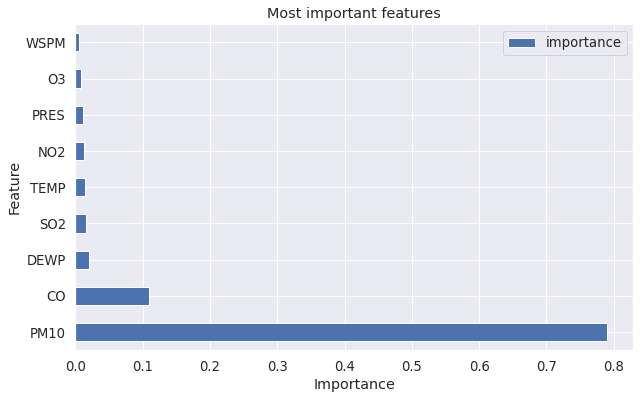

In [42]:
top_features = feature_importances.sort_values('importance', ascending=False).iloc[:9, :]

# Create a horizontal bar plot of the top 18 features
fig, ax = plt.subplots(figsize=(10, 6))
top_features.plot.barh(ax=ax)

# Set plot title and axis labels
ax.set_title('Most important features')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the plot
plt.show()

In [43]:
features = ['PM2.5','PM10', 'CO', 'DEWP', 'SO2', 'TEMP', 'NO2', 'PRES', 'O3', 'WSPM']

In [47]:
final = df_filled_scaled_encoded[features]
final.head()

,PM2.5,PM10,CO,DEWP,SO2,TEMP,NO2,PRES,O3,WSPM
0,4.0,4.0,300.0,-18.8,4.0,-0.7,7.0,1023.0,77.0,4.4
1,8.0,8.0,300.0,-18.2,4.0,-1.1,7.0,1023.2,77.0,4.7
2,7.0,7.0,300.0,-18.2,5.0,-1.1,10.0,1023.5,73.0,5.6
3,6.0,6.0,300.0,-19.4,11.0,-1.4,11.0,1024.5,72.0,3.1
4,3.0,3.0,300.0,-19.5,12.0,-2.0,12.0,1025.2,72.0,2.0


Future work will be done with this dataset

In [48]:
final.to_csv('dataframe.csv', index=False)